In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


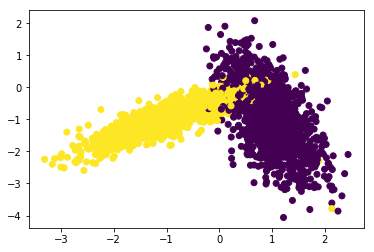

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

[1, 2, 3, 6, 8, 13, 17, 30, 45, 47]


In [0]:
from sklearn.metrics import accuracy_score
  
def randomly_select_params_in_range_from_1_to_len(params_range):
    
    p_values=random.sample(range(1, params_range),10)
    p_values.sort()#sorting the values
    return p_values



def RandomSearchCV(x_train,y_train,classifier, params_range, folds):
    group=[]
    grp=[]
    trainscores = []
    testscores  = [] 
    params_list=randomly_select_params_in_range_from_1_to_len(params_range)
    print(params_list)
    print(params_list) #printing the random params values
    params = {'n_neighbors':params_list}
    
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = [] 
        for i in range(0, folds):
            value=(len(x_train)/(folds))#Finding length of the group
            boundary=int(value)#converting to int value
            test_indices=list(set(list(range((boundary*i), (boundary*(i+1))))))#selecting Indices for group(i)        
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))#selecting Indices otehr than that of group(i) for testing          
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train)          
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) 
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores,params




  0%|          | 0/10 [00:00<?, ?it/s]

[3, 6, 20, 21, 23, 26, 29, 30, 35, 45]
[3, 6, 20, 21, 23, 26, 29, 30, 35, 45]




 10%|█         | 1/10 [00:00<00:05,  1.79it/s]

 20%|██        | 2/10 [00:01<00:04,  1.78it/s]

 30%|███       | 3/10 [00:01<00:04,  1.72it/s]

 40%|████      | 4/10 [00:02<00:03,  1.66it/s]

 50%|█████     | 5/10 [00:03<00:03,  1.62it/s]

 60%|██████    | 6/10 [00:03<00:02,  1.59it/s]

 70%|███████   | 7/10 [00:04<00:01,  1.57it/s]

 80%|████████  | 8/10 [00:05<00:01,  1.55it/s]

 90%|█████████ | 9/10 [00:05<00:00,  1.52it/s]

100%|██████████| 10/10 [00:06<00:00,  1.47it/s]



[0.968, 0.9611333333333333, 0.9568666666666666, 0.9572666666666666, 0.9571999999999999, 0.9573999999999999, 0.9578000000000001, 0.9575333333333332, 0.9576666666666666, 0.9578000000000001]
[0.9464, 0.9510666666666667, 0.9540000000000001, 0.9541333333333334, 0.9533333333333333, 0.9546666666666667, 0.9550666666666667, 0.9546666666666667, 0.9553333333333334, 0.9565333333333333]


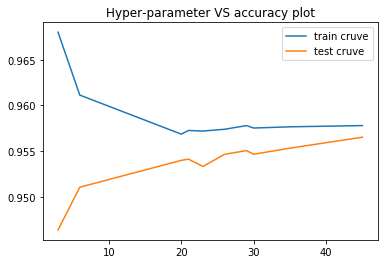

In [56]:
   
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
params_range=50
folds = 3
trainscores,testscores,params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)
print(trainscores)
print(testscores)
plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [0]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

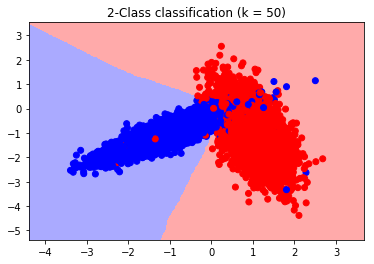

In [57]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors =50)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)